In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# آپلود یک عکس
uploaded = files.upload()
image_paths = list(uploaded.keys())[0]



Saving IMG_20241019_171523.jpg to IMG_20241019_171523.jpg
Saving IMG_20241025_185427.jpg to IMG_20241025_185427.jpg


Saving IMG_20240219_205229.jpg to IMG_20240219_205229.jpg
Saving IMG_20240704_200146.jpg to IMG_20240704_200146.jpg
Saving IMG_20241025_185427.jpg to IMG_20241025_185427 (1).jpg


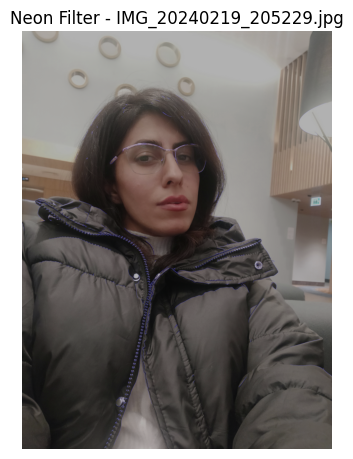

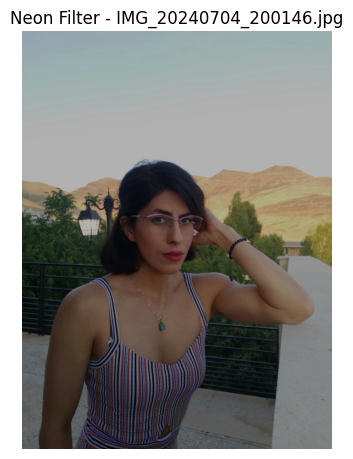

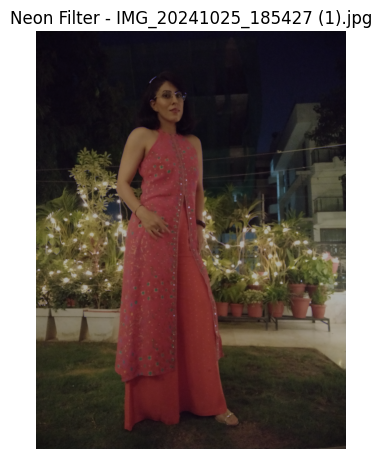

In [1]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# --- ۱) انتخاب/آپلود چند عکس ---

uploaded = files.upload()                 # چند فایل انتخاب کن
image_paths = list(uploaded.keys())       # لیست نام فایل‌ها

# --- ۲) توابع کمکی ---

def apply_blur(img_rgb, ksize=(9, 9)):
    """محو کردن نرم تصویر با GaussianBlur"""
    return cv2.GaussianBlur(img_rgb, ksize, 0)

def detect_edges(img_rgb, t1=50, t2=150):
    """لبه‌گیری با Canny روی نسخه خاکستری تصویر"""
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, t1, t2)
    return edges

def apply_neon_filter(img_rgb):
    """ساخت افکت نئون روی تصویر ورودی"""
    # ۱) محو کردن
    blur = apply_blur(img_rgb)

    # ۲) لبه‌گیری روی نسخه‌ی محوشده
    edges = detect_edges(blur)

    # ۳) ساخت تصویر نئونی فقط روی لبه‌ها (مثلاً کانال آبی)
    neon_edges = np.zeros(img_rgb.shape, dtype=np.uint8)
    neon_edges[:, :, 2] = edges          # 0=قرمز، 1=سبز، 2=آبی

    # ۴) سوار کردن نئون روی تصویر اصلی
    neon = cv2.addWeighted(img_rgb, 0.7, neon_edges, 1.5, 0)
    return neon

# --- ۳) اجرای فیلتر روی همه‌ی عکس‌ها ---

for image_path in image_paths:
    # خواندن و تبدیل رنگ
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # اعمال فیلتر نئون
    neon_img = apply_neon_filter(img_rgb)

    # نمایش نتیجه
    plt.figure(figsize=(4, 6))
    plt.imshow(neon_img)
    plt.axis('off')
    plt.title(f'Neon Filter - {image_path}')
    plt.show()
